<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_4/P4_Ejercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 5
Luego de abrir la vávula y una vez alcanzado el equilibrio, determinar:

a) Estado final del vapor (P, T, y/o x).    
b) Trabajo útil o neto.

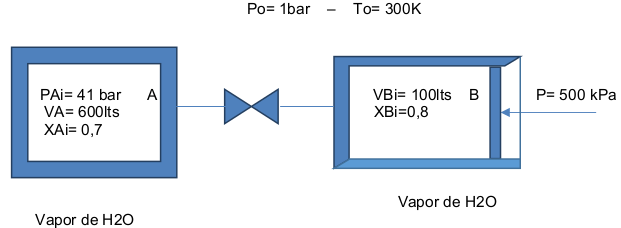

## Solución

In [ ]:
#!pip install CoolProp; # (instala biblioteca CoolProp en CoLab)
import CoolProp.CoolProp as cp;

In [ ]:
# Datos:
P_Ai = 41e5   # [Pa]
V_A = 600e-3  # [m^3]
x_Ai = 0.7
V_Bi = 100e-3 # [m^3]
x_Bi = 0.8
P = 500e3     # [Pa]
Po = 1e5      # [Pa]
To = 300      # [K]

In [ ]:
# Usando tabla de papel
# Volumen específico inicial en A
vp_iA = 0.001256 # [m^3/kg]
vpp_iA = 0.0485 # [m^3/kg]

# Energía interna específica inicial en A
up_iA = 1089.41e3 # [J/kg]
upp_iA = 2601.03e3 # [J/kg]

# Volumen específico inicial en B
vp_iB = 0.001093 # [m^3/kg]
vpp_iB = 0.3747 # [m^3/kg]

# Energía interna específica inicial en B
up_iB = 639.57e3 # [J/kg]
upp_iB = 2560.2e3 # [J/kg]

# Entalpía específica final
hp_f = 640.12e3 # [J/kg]
hpp_f = 2747.54e3  # [J/kg]

In [ ]:
#@title Usando CoolProp
# Volumen específico inicial en A
#vp_iA = 1/cp.PropsSI('D','P',P_Ai,'Q',0,'Water') # Líquido saturado
#vpp_iA = 1/cp.PropsSI('D','P',P_Ai,'Q',1,'Water') # Vapor saturado

# Energía interna específica inicial en A
#up_iA = cp.PropsSI('U','P',P_Ai,'Q',0,'Water') # Líquido saturado
#upp_iA = cp.PropsSI('U','P',P_Ai,'Q',1,'Water') # Vapor saturado

# Volumen específico inicial en B
#vp_iB = 1/cp.PropsSI('D','P',P,'Q',0,'Water') # Líquido saturado
#vpp_iB = 1/cp.PropsSI('D','P',P,'Q',1,'Water') # Vapor saturado

# Energía interna específica inicial en B
#up_iB = cp.PropsSI('U','P',P,'Q',0,'Water') # Líquido saturado
#upp_iB = cp.PropsSI('U','P',P,'Q',1,'Water') # Vapor saturado

# Entalpía específica final
#hp_f = cp.PropsSI('H','P',P,'Q',0,'Water') # Líquido saturado
#hpp_f = cp.PropsSI('H','P',P,'Q',1,'Water') # Vapor saturado

In [ ]:
# Volumen específico inicial en A
v_Ai = vp_iA + x_Ai*(vpp_iA - vp_iA)
# Volumen específico inicial en B
v_Bi = vp_iB + x_Bi*(vpp_iB - vp_iB)
# Energía interna específica inicial en A
u_Ai = up_iA + x_Ai*(upp_iA - up_iA)
# Energía interna específica inicial en B
u_Bi = up_iB + x_Bi*(upp_iB - up_iB)

In [ ]:
# Masa inicial en A
m_Ai = V_A/v_Ai
# Masa inicial en B
m_Bi = V_Bi/v_Bi

Planteando la ecuación del primer principio, se tiene que

$$Q = \Delta U + W_{\Delta V} = 0$$

Entonces
$$(U_f - U_i) + P(V_f - V_i) = 0 \tag{1}$$

Desarrollamos
$$U_f - U_i + PV_f - PV_i = 0$$

Reordemnamos
$$\underbrace{U_f + PV_f}_{H_f} - U_i - PV_i = 0$$

En la ecuación $(1)$ se tienen dos incógnitas, $U_f$ y $V_f$. Para resolver la indeterminación, y teniendo en cuenta que $P_f = P_\mathrm{exterior} = P = \mathrm{constante}$, planteamos:

$$H_f = U_f + PV_f \tag{2}$$

Al reemplazar en la ecuación $(1)$ por la relación dada en $(2)$, se tiene que

$$H_f - U_i - PV_i = 0$$

Entonces
$$H_f = U_i + PV_i$$

$$h_f = \frac{U_i - PV_i}{m_{Ai} + m_{Bi}}$$

$$h_f = \frac{m_{Ai}u_{Ai} + m_{Bi}u_{Bi} + P(V_A + V_{Bi})}{m_{Ai} + m_{Bi}}$$

In [ ]:
# Entalpía específica final
h_f = (m_Ai*u_Ai + m_Bi*u_Bi + P*(V_A + V_Bi))/(m_Ai + m_Bi)

In [ ]:
cp.PhaseSI('P',P,'H',h_f,'Water')

'twophase'

In [ ]:
x_f = (h_f - hp_f)/(hpp_f - hp_f)

In [ ]:
T_f = cp.PropsSI('T','P',P,'H',h_f,'Water')

In [ ]:
#@title Estado final del vapor
print("P = %.2f [kPa]"%(P/1000))
print("T_f = %.2f [K]"%T_f)
print("x_f = %.3f"%x_f)

P = 500.00 [kPa]
T_f = 424.98 [K]
x_f = 0.725


In [ ]:
cp.PropsSI('Q','P',P,'H',h_f,'Water')

0.7246796667223101

In [ ]:
vp_f = vp_iB
vpp_f = vpp_iB


v_f = vp_f + x_f*(vpp_f - vp_f)

In [ ]:
V_f = v_f*(m_Ai + m_Bi)
V_i = V_A + V_Bi

In [ ]:
# Trabajo útil está dado por:
W_util = (P - Po)*(V_f - V_i)

In [ ]:
#@title Trabajo útil
print("Trabajo útil")
print("W_util = %.2f [kJ]"%(W_util/1000))

Trabajo útil
W_util = 1657.35 [kJ]


In [ ]:
%reset -s -f